<a href="https://colab.research.google.com/github/linlills/NeuralNetworks/blob/main/Vdovina_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
63/63 [==============================] - 44s 692ms/step - loss: 2.8489 - acc: 0.2939 - val_loss: 2.2539 - val_acc: 0.3630
Epoch 2/20
63/63 [==============================] - 44s 691ms/step - loss: 2.2097 - acc: 0.3925 - val_loss: 2.0599 - val_acc: 0.4980
Epoch 3/20
63/63 [==============================] - 44s 693ms/step - loss: 1.9113 - acc: 0.5051 - val_loss: 1.6756 - val_acc: 0.5670
Epoch 4/20
63/63 [==============================] - 44s 694ms/step - loss: 1.7534 - acc: 0.5412 - val_loss: 1.6428 - val_acc: 0.5730
Epoch 5/20
63/63 [==============================] - 44s 693ms/step - loss: 1.6533 - acc: 0.5633 - val_loss: 1.6763 - val_acc: 0.5700
Epoch 6/20
63/63 [==============================] - 43s 688ms/step - loss: 1.5516 - acc: 0.5852 - val_loss: 1.7651 - val_acc: 0.5600
Epoch 7/20
63/63 [==============================] - 43s 686ms/step - loss: 1.4786 - acc: 0.6051 - val_loss: 1.6917 - val_acc: 0.5420
Epoch 8/20
63/63 [==============================] - 43s 686ms/step - 

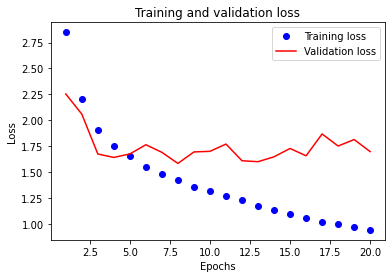

In [ ]:
from keras import models
from keras import layers
from keras.layers import Dense, Dropout
from keras.datasets import reuters
from keras.preprocessing import sequence
import numpy as np

max_features = 10000 # количество слов, рассматриваемых как признаки
maxlen = 500 # обрезка текста после этого количества слов
batch_size = 32
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words= max_features)
# преобразование списка последовательностей (списки целых чисел) в 2D Numpy массив
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels) 

partial_x_train = train_data
partial_y_train = one_hot_train_labels
x_test = test_data
y_test = one_hot_test_labels

from keras.layers import Embedding
from keras.layers import SimpleRNN
from keras.layers import LSTM

model = models.Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(32, return_sequences=True))
model.add(layers.Dropout(0.5))
model.add(SimpleRNN(32, return_sequences=True))
model.add(layers.Dropout(0.5))
#model.add(SimpleRNN(32, return_sequences=True))
model.add(LSTM(32))
model.add(layers.Dropout(0.5))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

# создание проверочного набора для 1000 образцов из обучающей выборки
x_val = train_data[:1000]
partial_x_train = train_data[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# обучение модели в течение 20 эпох
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

# графики потерь на этапах обучения и проверки
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss',c='red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

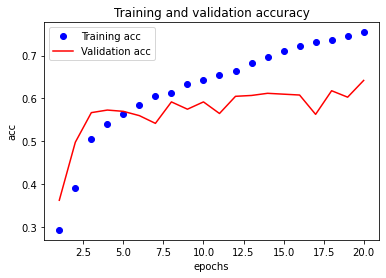

In [ ]:
# графики точности на этапах обучения
epochs= range(1, len(loss) + 1)
plt.plot(epochs, history.history['acc'], 'bo', label='Training acc')
plt.plot(epochs, history.history['val_acc'], 'b', label='Validation acc', c='red')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()